In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [8]:
digits = load_digits() # dataset - multiple images of digits (8X8)

In [9]:
print(dir(digits))     # returns list of the various attributes and methods

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [24]:
# digits
print(digits.data[1]) # prints the 2nd image of the dataset as a 1D array

[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


<Figure size 432x288 with 0 Axes>

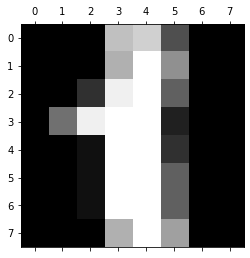

In [20]:
# we will use matplotlib to print the actual images
plt.gray()
plt.matshow(digits.images[1])

AxesImage(43.2,25.92;223.2x223.2)
AxesImage(43.2,25.92;223.2x223.2)
AxesImage(43.2,25.92;223.2x223.2)
AxesImage(43.2,25.92;223.2x223.2)


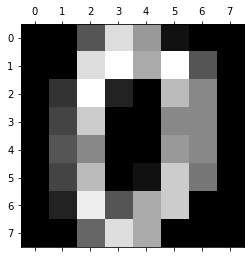

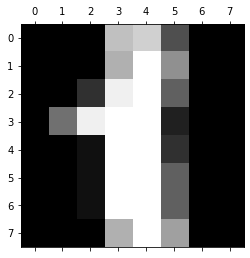

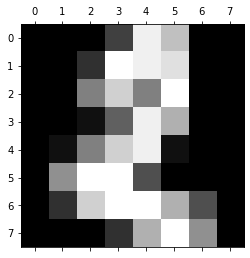

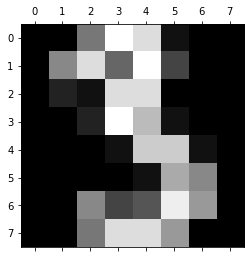

In [23]:
for i in range(4):
  print(plt.matshow(digits.images[i]))

In [46]:
digits.target[0:5] # names of the images 

array([0, 1, 2, 3, 4])

In [53]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(digits.data,digits.target,test_size=0.2) 
# divides the dataframe into a ratio of 2:8

In [48]:
len(xTest)

360

In [49]:
len(xTrain)

1437

In [50]:
from sklearn.linear_model import LinearRegression
TrainingModel = LinearRegression()
TrainingModel.fit(xTrain, yTrain) # xTrain= data used for training; yTrain= expected output 

LinearRegression()

In [54]:
print("Accuracy of the model: ")
print(TrainingModel.score(xTest, yTest)*100,"%")

Accuracy of the model: 
61.846302396739816 %
